In [2]:
import pandas as pd
import numpy as np
import csv

# import matplotlib, start looking at data?
%matplotlib inline
import matplotlib.pyplot as plt

# INFO HERE: https://python-graph-gallery.com/85-density-plot-with-matplotlib/
from scipy.stats import kde

from scipy.spatial import ConvexHull

<h1>Getting the data</h1>
The formant traces are pulled from Praat using a script. I'm going to be working on a script, but for now, I'm just pulling this formant data in from a file that used two different scripts. Don't follow quite these steps the next time.

In [3]:
formants = pd.read_csv("test.formant", sep='\t')

In [4]:
formants

,rowLabel,Time,F1,F2,F3,F4
0,?,0.035615,752.362103,1908.886347,3191.922801,2550.404574
1,?,0.060615,764.286189,1937.740001,3191.715028,2581.148195
2,?,0.085615,776.210275,1966.593655,3211.537664,2596.394543
3,?,0.110615,814.446547,2030.167180,3211.355441,2611.640890
4,?,0.135615,820.152373,2093.740704,3219.206712,2667.331312
...,...,...,...,...,...,...
5126,?,128.185615,798.036143,2257.115494,3173.352947,3017.171764
5127,?,128.210615,908.048500,2379.651852,3263.522412,3055.029544
5128,?,128.235615,1157.970837,2502.188210,3353.691878,3092.887324
5129,?,128.260615,1407.893173,2939.306281,3872.394703,3488.324132


Hmm, this is weird, but F3 looks like it's always lower than F4. Is this true? If so, I should simply flip those columns.

In [5]:
formants = formants.drop(["rowLabel"], axis=1)

In [6]:
formants

,Time,F1,F2,F3,F4
0,0.035615,752.362103,1908.886347,3191.922801,2550.404574
1,0.060615,764.286189,1937.740001,3191.715028,2581.148195
2,0.085615,776.210275,1966.593655,3211.537664,2596.394543
3,0.110615,814.446547,2030.167180,3211.355441,2611.640890
4,0.135615,820.152373,2093.740704,3219.206712,2667.331312
...,...,...,...,...,...
5126,128.185615,798.036143,2257.115494,3173.352947,3017.171764
5127,128.210615,908.048500,2379.651852,3263.522412,3055.029544
5128,128.235615,1157.970837,2502.188210,3353.691878,3092.887324
5129,128.260615,1407.893173,2939.306281,3872.394703,3488.324132


In [7]:
filter = formants["F4"] <= formants["F3"]
filter.shape

(5131,)

In [8]:
np.count_nonzero(filter)

5129

In [9]:
formants[filter]

,Time,F1,F2,F3,F4
0,0.035615,752.362103,1908.886347,3191.922801,2550.404574
1,0.060615,764.286189,1937.740001,3191.715028,2581.148195
2,0.085615,776.210275,1966.593655,3211.537664,2596.394543
3,0.110615,814.446547,2030.167180,3211.355441,2611.640890
4,0.135615,820.152373,2093.740704,3219.206712,2667.331312
...,...,...,...,...,...
5126,128.185615,798.036143,2257.115494,3173.352947,3017.171764
5127,128.210615,908.048500,2379.651852,3263.522412,3055.029544
5128,128.235615,1157.970837,2502.188210,3353.691878,3092.887324
5129,128.260615,1407.893173,2939.306281,3872.394703,3488.324132


In [10]:
filter.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5126    False
5127    False
5128    False
5129    False
5130    False
Length: 5131, dtype: bool

In [11]:
formants.loc[filter, ['F3', 'F4']] = formants.loc[filter, ['F4', 'F3']].values

In [12]:
filter = formants["F4"] <= formants["F3"]
np.count_nonzero(filter)

0

In [13]:
formants

,Time,F1,F2,F3,F4
0,0.035615,752.362103,1908.886347,2550.404574,3191.922801
1,0.060615,764.286189,1937.740001,2581.148195,3191.715028
2,0.085615,776.210275,1966.593655,2596.394543,3211.537664
3,0.110615,814.446547,2030.167180,2611.640890,3211.355441
4,0.135615,820.152373,2093.740704,2667.331312,3219.206712
...,...,...,...,...,...
5126,128.185615,798.036143,2257.115494,3017.171764,3173.352947
5127,128.210615,908.048500,2379.651852,3055.029544,3263.522412
5128,128.235615,1157.970837,2502.188210,3092.887324,3353.691878
5129,128.260615,1407.893173,2939.306281,3488.324132,3872.394703


In [14]:
formants["F2-F1"] = formants["F2"]-formants["F1"]
formants

,Time,F1,F2,F3,F4,F2-F1
0,0.035615,752.362103,1908.886347,2550.404574,3191.922801,1156.524245
1,0.060615,764.286189,1937.740001,2581.148195,3191.715028,1173.453812
2,0.085615,776.210275,1966.593655,2596.394543,3211.537664,1190.383380
3,0.110615,814.446547,2030.167180,2611.640890,3211.355441,1215.720633
4,0.135615,820.152373,2093.740704,2667.331312,3219.206712,1273.588331
...,...,...,...,...,...,...
5126,128.185615,798.036143,2257.115494,3017.171764,3173.352947,1459.079351
5127,128.210615,908.048500,2379.651852,3055.029544,3263.522412,1471.603352
5128,128.235615,1157.970837,2502.188210,3092.887324,3353.691878,1344.217374
5129,128.260615,1407.893173,2939.306281,3488.324132,3872.394703,1531.413108


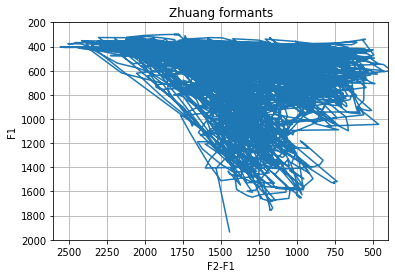

In [15]:
fig, ax = plt.subplots()
ax.plot(formants["F2-F1"], formants["F1"])

ax.set_xlim(2600, 400)  # decreasing F2 - F1
ax.set_ylim(2000, 200)
ax.set(xlabel='F2-F1', ylabel='F1',
       title='Zhuang formants')
ax.grid()

#fig.savefig("test.png")
plt.show()

Need to normalize data:

$$F_j^* (n) = \frac{F_j(n) - F_j^{median}}{F_j^{median}} \text{ ,  for  } j = \{1, 2\} \text{ , }n = \{1 ... N\}$$

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5724721/

In [16]:
formants["F1n"], formants["F2n"] = (formants["F1"] - formants["F1"].median()) / formants["F1"].median(), (formants["F2"] - formants["F2"].median()) / formants["F2"].median()
formants

,Time,F1,F2,F3,F4,F2-F1,F1n,F2n
0,0.035615,752.362103,1908.886347,2550.404574,3191.922801,1156.524245,0.399160,-0.060373
1,0.060615,764.286189,1937.740001,2581.148195,3191.715028,1173.453812,0.421335,-0.046170
2,0.085615,776.210275,1966.593655,2596.394543,3211.537664,1190.383380,0.443510,-0.031967
3,0.110615,814.446547,2030.167180,2611.640890,3211.355441,1215.720633,0.514617,-0.000673
4,0.135615,820.152373,2093.740704,2667.331312,3219.206712,1273.588331,0.525228,0.030620
...,...,...,...,...,...,...,...,...
5126,128.185615,798.036143,2257.115494,3017.171764,3173.352947,1459.079351,0.484099,0.111039
5127,128.210615,908.048500,2379.651852,3055.029544,3263.522412,1471.603352,0.688688,0.171356
5128,128.235615,1157.970837,2502.188210,3092.887324,3353.691878,1344.217374,1.153466,0.231674
5129,128.260615,1407.893173,2939.306281,3488.324132,3872.394703,1531.413108,1.618244,0.446840


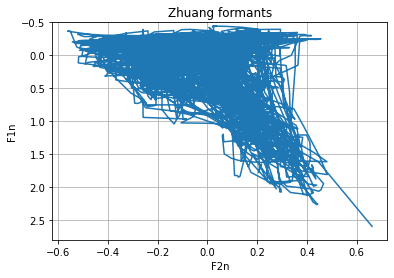

In [17]:
fig, ax = plt.subplots()
ax.plot(formants["F2n"], formants["F1n"])

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.8, -0.5)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Zhuang formants')
ax.grid()

#fig.savefig("test.png")
plt.show()

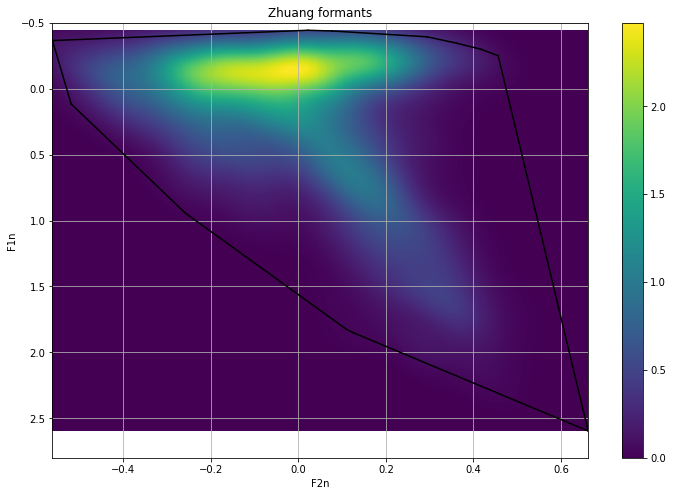

In [33]:
# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=600
k = kde.gaussian_kde([formants["F2n"],formants["F1n"]])
xi, yi = np.mgrid[formants["F2n"].min():formants["F2n"].max():nbins*1j, formants["F1n"].min():formants["F1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.8, -0.5)  # decreasing F1
ax.set(xlabel='F2n', ylabel='F1n',
       title='Zhuang formants')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

hull = ConvexHull(formants[["F2n","F1n"]])

for simplex in hull.simplices:
    plt.plot(formants["F2n"].iloc[simplex], formants["F1n"].iloc[simplex], 'k-')

#fig.savefig("test.png")
plt.show()

Now to calculate and display the convex hull:

https://stackoverflow.com/questions/29964238/scipy-convex-hull-error

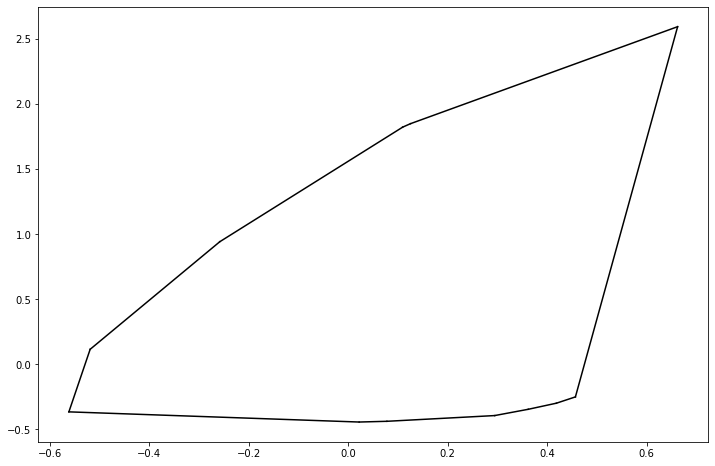

In [19]:
hull = ConvexHull(formants[["F2n","F1n"]])

for simplex in hull.simplices:
    plt.plot(formants["F2n"].iloc[simplex], formants["F1n"].iloc[simplex], 'k-')

Hmm, I need to figure out a way to set the convex hull to be determined at a particular density value. This looks like right now, it's just enclosing all of the raw F1n and F2n, not the density values.

<h2>Smoothing</h2>

In Story & Bunton 2017, they used two filters to preprocess the formant traces: a "3-point median filter" followed by a "5-point smoothing filter". Brad's reasoning was that the first filter removes spurious outliers, then the second filter smooths the trace.

I'm not exactly sure how to implement a median filter in a way that would throw out spurious points, but I did discover that SciPy has a built-in smoothing function:

https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

mentions a procedure called a Savitzky-Golay filter, which has been implemented in SciPy.

In [22]:
from scipy.signal import savgol_filter

# yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

formants["sF1"] = savgol_filter(formants["F1"], 5, 3)

In [23]:
formants["F1"] - formants["sF1"]

0       -1.216497
1        4.865989
2       -7.298984
3        7.553145
4       -6.835723
          ...    
5126    13.577500
5127   -23.984568
5128    35.636675
5129   -23.757783
5130     5.939446
Length: 5131, dtype: float64

Hmm, how to plot just a section of the data, to show how the smoothed formant trace and the original formant trace compare?

<function matplotlib.pyplot.show(*args, **kw)>

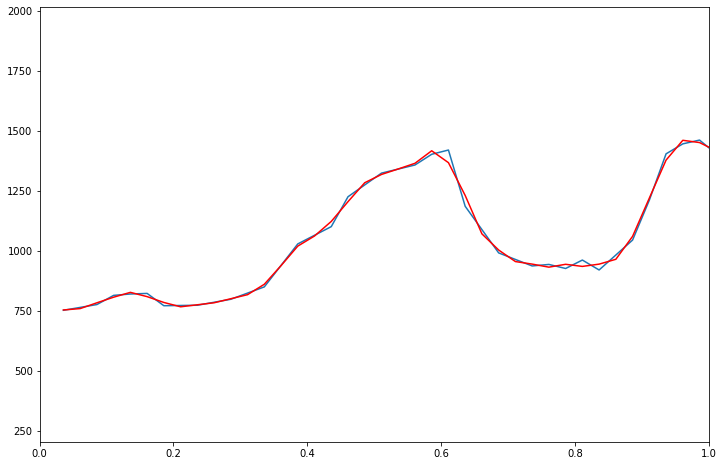

In [29]:
plt.plot(formants["Time"], formants["F1"])
plt.plot(formants["Time"], formants["sF1"], color='red')
plt.xlim(0, 1)
plt.show

<p>Here's a problem with this implementation of smoothing: The formants that are produced in speech ought to be smoothly continuous, since the articulator movements that produce those sounds are smoothly continuous. However, the formant data no longer conforms to the movement of the articulators, since the voiceless intervals have been removed. This means that there could be sharp discontinuities within the formant data--this would be normal, since the time during which some of the articulator movements happened (while voiceless, without producing measurable formants) has been cut from the data. However, the smoothing algorithm has no knowledge of that, so it's smoothing out those *expected* discontinuities. Is my only choice between smoothing out the expected discontinuities, and leaving in the noise?</p>

Does the smoothing actually make a difference?

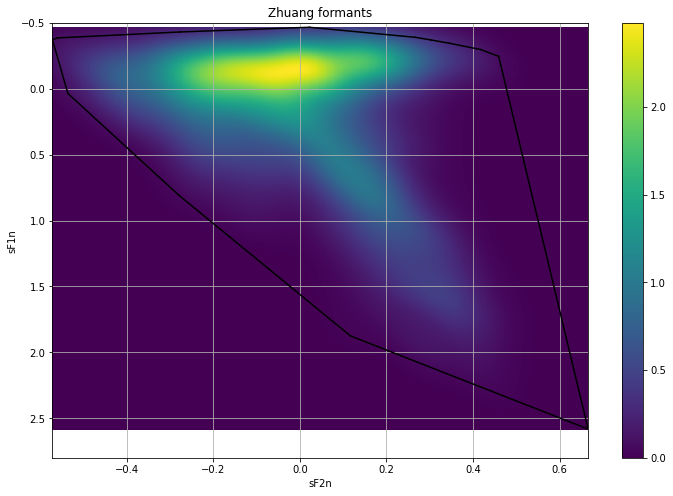

In [31]:
formants["sF2"] = savgol_filter(formants["F2"], 5, 3)

formants["sF1n"], formants["sF2n"] = (formants["sF1"] - formants["sF1"].median()) / formants["sF1"].median(), (formants["sF2"] - formants["sF2"].median()) / formants["sF2"].median()
formants

# formants["F2n", "F1n"].plot.kde
fig, ax = plt.subplots()

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=600
k = kde.gaussian_kde([formants["sF2n"],formants["sF1n"]])
xi, yi = np.mgrid[formants["sF2n"].min():formants["sF2n"].max():nbins*1j, formants["sF1n"].min():formants["sF1n"].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.colorbar()
#plt.show()

# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

# Add color bar
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.colorbar()
#plt.show()

#ax.set_xlim(2600, 400)  # decreasing F2
ax.set_ylim(2.8, -0.5)  # decreasing F1
ax.set(xlabel='sF2n', ylabel='sF1n',
       title='Zhuang formants')
ax.grid()

plt.rcParams['figure.figsize'] = [12, 8]

hull = ConvexHull(formants[["sF2n","sF1n"]])

for simplex in hull.simplices:
    plt.plot(formants["sF2n"].iloc[simplex], formants["sF1n"].iloc[simplex], 'k-')

#fig.savefig("test.png")
plt.show()